##**The aim of this project is to build a model that explains how the factors in the demand and supply datatset impacted the house prices in US over the last 20 years.**

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#importing the demand dataset from google drive
df1=pd.read_csv('/content/drive/MyDrive/Datasets/demand_data.csv')

In [3]:
#displaying the top 10 values form the demand dataset
df1.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48


In [4]:
#converting the Date column to date time format
df1['DATE']=pd.to_datetime(df1['DATE'])

In [5]:
#information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          84 non-null     datetime64[ns]
 1   UNEM_RATE     84 non-null     float64       
 2   MORTGAGE      84 non-null     float64       
 3   GDPC1         84 non-null     float64       
 4   FORECLOSURES  84 non-null     float64       
 5   HPI           84 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 4.1 KB


In [6]:
#importing the supply dataset
df2=pd.read_csv('/content/drive/MyDrive/Datasets/supply_data.csv')

In [7]:
#displaying top 10 values of supply dataset
df2.head()

,Unnamed: 0,Period,Permit_Number,construction,Homes_Sold,Housing_Starts
0,1,01-01-2000,1727,353065,873,1636
1,2,01-02-2000,1692,351933,856,1737
2,3,01-03-2000,1651,353452,900,1604
3,4,01-04-2000,1597,356188,841,1626
4,5,01-05-2000,1543,349907,857,1575


In [8]:
#information about the supply dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      250 non-null    int64 
 1   Period          250 non-null    object
 2   Permit_Number   250 non-null    int64 
 3   construction    250 non-null    int64 
 4   Homes_Sold      250 non-null    int64 
 5   Housing_Starts  250 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 11.8+ KB


In [9]:
#dropping the column
df2.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
#converting the 'Period' column in YYYY-MM-DD format
df2['Period'] = pd.to_datetime(df2['Period'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

In [11]:
#renaming the Period column to DATE column for merging the datasets
df2.rename(columns={'Period':'DATE'},inplace=True)

In [12]:
df2.head()

,DATE,Permit_Number,construction,Homes_Sold,Housing_Starts
0,2000-01-01,1727,353065,873,1636
1,2000-02-01,1692,351933,856,1737
2,2000-03-01,1651,353452,900,1604
3,2000-04-01,1597,356188,841,1626
4,2000-05-01,1543,349907,857,1575


In [13]:
#converting the date column to date time format
df2['DATE']=pd.to_datetime(df2['DATE'])

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            250 non-null    datetime64[ns]
 1   Permit_Number   250 non-null    int64         
 2   construction    250 non-null    int64         
 3   Homes_Sold      250 non-null    int64         
 4   Housing_Starts  250 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 9.9 KB


In [15]:
#merging the two datasets
final_df=pd.merge(df1,df2,on='DATE')

In [16]:
final_df.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,Permit_Number,construction,Homes_Sold,Housing_Starts
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34,1727,353065,873,1636
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67,1597,356188,841,1626
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79,1542,337374,887,1463
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27,1577,344095,933,1549
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48,1699,348279,936,1600


In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            84 non-null     datetime64[ns]
 1   UNEM_RATE       84 non-null     float64       
 2   MORTGAGE        84 non-null     float64       
 3   GDPC1           84 non-null     float64       
 4   FORECLOSURES    84 non-null     float64       
 5   HPI             84 non-null     float64       
 6   Permit_Number   84 non-null     int64         
 7   construction    84 non-null     int64         
 8   Homes_Sold      84 non-null     int64         
 9   Housing_Starts  84 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 7.2 KB


In [18]:
#generating the year column to get information about yearly data
final_df['YEAR'] = final_df['DATE'].dt.year
final_df.head()

,DATE,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,Permit_Number,construction,Homes_Sold,Housing_Starts,YEAR
0,2000-01-01,4.03,8.26,12935.252,1.95,101.34,1727,353065,873,1636,2000
1,2000-04-01,3.93,8.32,13170.749,1.97,103.67,1597,356188,841,1626,2000
2,2000-07-01,4.00,8.02,13183.890,2.09,105.79,1542,337374,887,1463,2000
3,2000-10-01,3.90,7.62,13262.250,2.23,108.27,1577,344095,933,1549,2000
4,2001-01-01,4.23,7.01,13219.251,2.34,110.48,1699,348279,936,1600,2001


In [19]:
final_df.describe()

,UNEM_RATE,MORTGAGE,GDPC1,FORECLOSURES,HPI,Permit_Number,construction,Homes_Sold,Housing_Starts,YEAR
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.00000,84.000000,84.000000
mean,5.986667,5.092381,15968.048810,4.745119,161.669405,1317.440476,429697.797619,697.72619,1274.440476,2010.000000
std,1.976243,1.324841,1762.701831,3.290622,30.778158,474.664786,123184.105531,300.88129,464.290425,6.091669
min,3.600000,2.760000,12935.252000,1.410000,101.340000,521.000000,236512.000000,283.00000,478.000000,2000.000000
25%,4.552500,3.942500,14821.741750,2.097500,140.495000,1005.250000,342414.750000,442.50000,921.000000,2005.000000
50%,5.430000,4.885000,15768.528500,3.160000,162.240000,1314.500000,416571.000000,627.00000,1250.500000,2010.000000
75%,7.005000,6.135000,17394.926250,7.517500,182.945000,1665.250000,538064.000000,936.00000,1628.500000,2015.000000
max,13.070000,8.320000,19202.310000,11.540000,232.550000,2212.000000,675679.000000,1389.00000,2273.000000,2020.000000


In [20]:
#checking for null values in final Dataset
final_df.isna().sum()

DATE              0
UNEM_RATE         0
MORTGAGE          0
GDPC1             0
FORECLOSURES      0
HPI               0
Permit_Number     0
construction      0
Homes_Sold        0
Housing_Starts    0
YEAR              0
dtype: int64

In [21]:
#calculating the total houses sold year-wise
year_sales=final_df.groupby('YEAR')['Homes_Sold'].sum()
year_sales

YEAR
2000    3534
2001    3596
2002    3778
2003    4323
2004    4744
2005    5188
2006    4203
2007    3283
2008    2033
2009    1480
2010    1341
2011    1229
2012    1416
2013    1706
2014    1724
2015    2005
2016    2296
2017    2366
2018    2428
2019    2668
2020    3268
Name: Homes_Sold, dtype: int64

<Axes: title={'center': 'Year-Wise Houses Sold'}, xlabel='YEAR', ylabel='Number'>

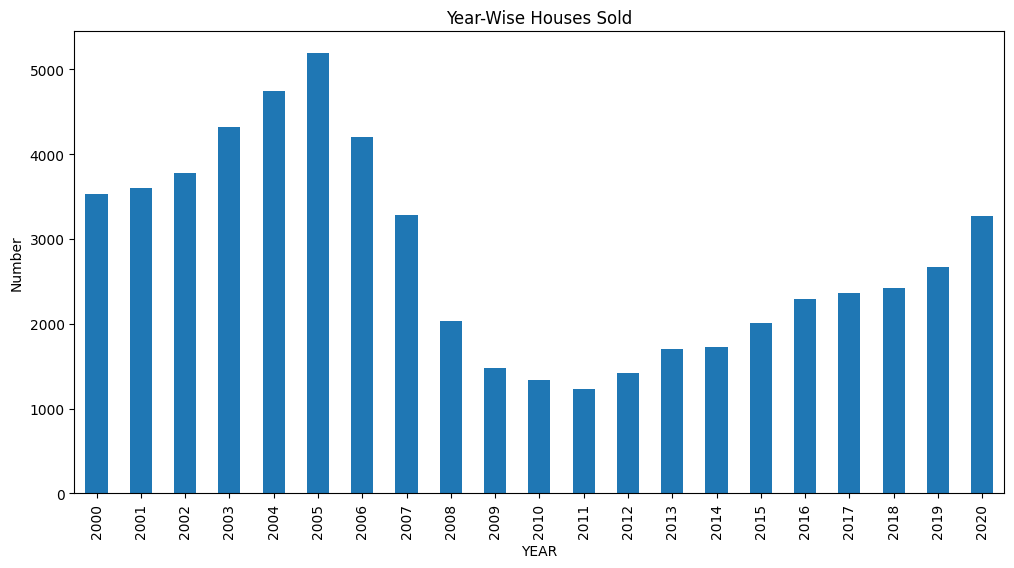

In [22]:
#plotting the year-wise houses sold
plt.figure(figsize=(12,6))
plt.title('Year-Wise Houses Sold')
plt.xlabel('Year')
plt.ylabel('Number')
year_sales.plot(kind='bar')

##**Model Training and Evaluation**

In [23]:
#selecting the feature and target variable
X=final_df.drop(['DATE','HPI'],axis=1)
y=final_df['HPI']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [25]:
#selecting the linear regression Model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
#predicting using the Linear Regression Model
pred=model.predict(X_test)
pred

array([176.95498434, 141.63805159, 148.24907329, 143.1288189 ,
       176.25500842, 151.17385747, 111.87776234, 157.43717131,
       181.42224782, 117.00306955, 197.46020283, 130.2280674 ,
       186.03602727, 207.55072068, 146.11539476, 183.76338072,
       207.41792601, 209.30225663, 141.52838174, 209.31160236,
       227.72592851, 169.41360005, 145.36870891, 178.40379507,
       155.96918084, 145.34302186])

In [27]:
#checking the accuracy of the model
r2=r2_score(y_test,pred)

In [28]:
print(r2)

0.9810990440229235


##**Conclusion**
**The accuracy of the Linear Regression model was found to be 98% which is great. The model learned from the past data and can predict future values.**